In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import  keras 

In [2]:
# import the dataset 
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# make the classes for
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
x_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [5]:
def plot_show(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

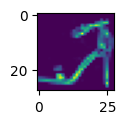

In [6]:
plot_show(8)

In [7]:
classes[y_train[8]]

'Sandal'

In [8]:
#scale the value 
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [9]:
x_train_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
#one hot encoding 
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)

In [11]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [12]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(700,activation='relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

model.fit(x_train_scaled,y_train_categorical,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4783 - accuracy: 0.8261
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3629 - accuracy: 0.8674
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3311 - accuracy: 0.8769
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3018 - accuracy: 0.8878
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2843 - accuracy: 0.8938
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2684 - accuracy: 0.8981
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2556 - accuracy: 0.9026
Epoch 8/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2459 - accuracy: 0.9079
Epoch 9/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2347 - accuracy: 0.9106
Epoch 10/20
1875/1875 [==============================] - 18s 9ms

In [21]:
classes[np.argmax(model.predict(x_test_scaled)[2])]

313/313 [==============================] - 2s 5ms/step


'Trouser'

In [20]:
classes[y_test[1]]

'Pullover'